# Sprint 4
## Tasca M4 T01

Allison Garces Castaño

In [1]:
#Importando librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
#Cargando el DataFrame

datos = pd.read_csv("preu_lloguer_per_trimestre_i_barri.csv", sep=";")

df = pd.DataFrame(data=datos)
df.sample(frac=0.5, random_state=1) #Una muestra aleatoria del 50% DataFrame y ramdom_state True

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
514,2021,4,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),14.0
355,2021,3,10,Sant Martí,64,el Camp de l'Arpa del Clot,Lloguer mitjà mensual (Euros/mes),830.8
23,2021,1,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1578.0
385,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà per superfície (Euros/m2 mes),15.8
...,...,...,...,...,...,...,...,...
12,2021,1,3,Sants-Montjuïc,13,la Marina de Port,Lloguer mitjà mensual (Euros/mes),810.6
474,2021,4,7,Horta-Guinardó,37,el Carmel,Lloguer mitjà mensual (Euros/mes),683.8
583,2021,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),11.3
365,2021,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.9


In [33]:
#Estilos de Fuente

font = {'family':'Sans Serif', 'color':'#A67C58','size':20}
font1 = {'family':'Sans Serif','color':'#8C593B','size':25}

In [34]:
#Eliminando Nan de la columna Preu

df.isnull().sum()
df['Preu'].fillna(df['Preu'].mean(), inplace=True)
print(df['Preu'])

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: float64


### Una variable categórica (Distrito o Barrio)

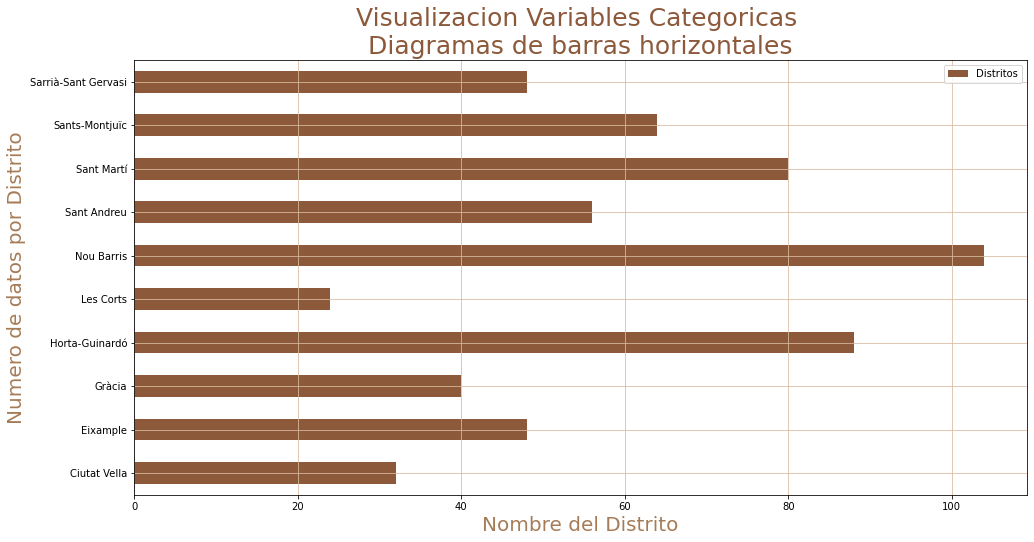

In [19]:
do = df.groupby(["Nom_Districte"]).size().reset_index(name="COUNT")
#df = pd.DataFrame(data=df)

do.plot(x="Nom_Districte", y="COUNT", kind="barh",figsize=(16,8),color="#8C593B", label="Distritos")
plt.title("Visualizacion Variables Categoricas \nDiagramas de barras horizontales",fontdict= font1)
plt.ylabel('Numero de datos por Distrito', fontdict= font)
plt.xlabel('Nombre del Distrito',fontdict= font)
plt.grid(color="#D9BBA0")
plt.legend(loc='upper right')

plt.savefig('variableCategorica.png')
plt.show()

### Una variable numérica (Precio)

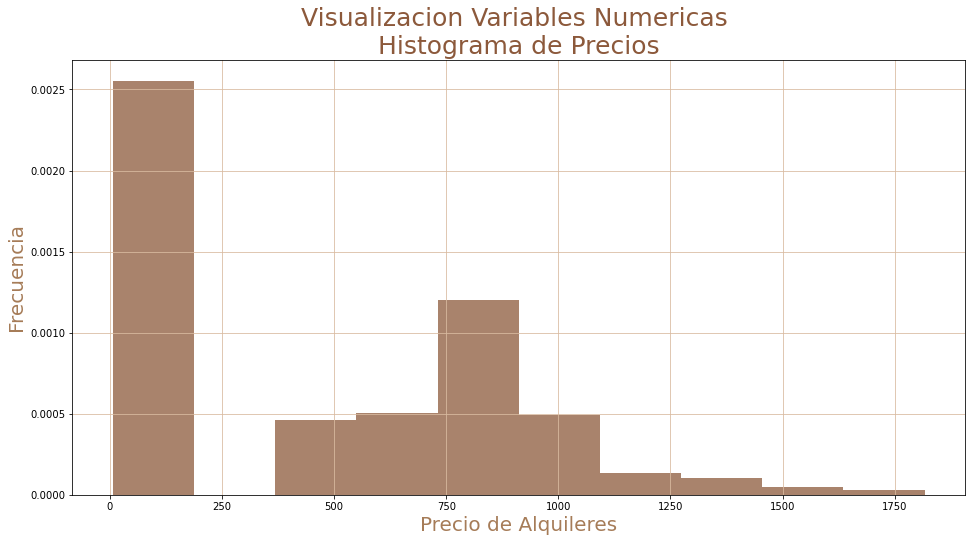

In [6]:
plt.figure(figsize=(16,8))

plt.hist(df.Preu, density=True, facecolor="#8C593B", alpha=0.75)

plt.xlabel("Precio de Alquileres",fontdict= font)
plt.ylabel("Frecuencia",fontdict= font)
plt.title("Visualizacion Variables Numericas \nHistograma de Precios",fontdict= font1)

plt.grid(color="#D9BBA0")

plt.savefig('variableNumerica.png')
plt.show()

### Una variable numérica y una categórica (Distrito y Precio)

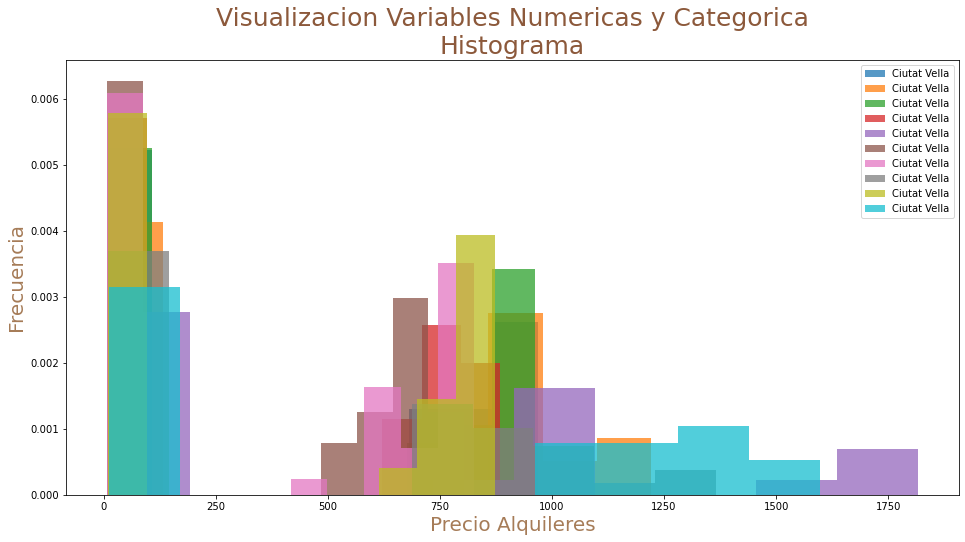

['Ciutat Vella',
 'Eixample',
 'Gràcia',
 'Horta-Guinardó',
 'Les Corts',
 'Nou Barris',
 'Sant Andreu',
 'Sant Martí',
 'Sants-Montjuïc',
 'Sarrià-Sant Gervasi']

In [46]:
plt.figure(figsize=(16,8)) #Tamaño de la Figura

do = df.groupby("Nom_Districte").Preu.hist(density=20, alpha=0.75, label=labels)

                                      
plt.xlabel("Precio Alquileres",fontdict= font)
plt.ylabel("Frecuencia",fontdict= font)
plt.title("Visualizacion Variables Numericas y Categorica\nHistograma",fontdict= font1)
plt.grid(None)
plt.legend()

plt.savefig('variableNum&Cat.png')
plt.show()

labels

### Dos variables numéricas (Año o Trimestre y Precio)

In [8]:
#do = df.groupby(["Nom_Districte"]).size().reset_index(name="COUNT")
#do["Nom_Districte"].to_numpy().tolist()

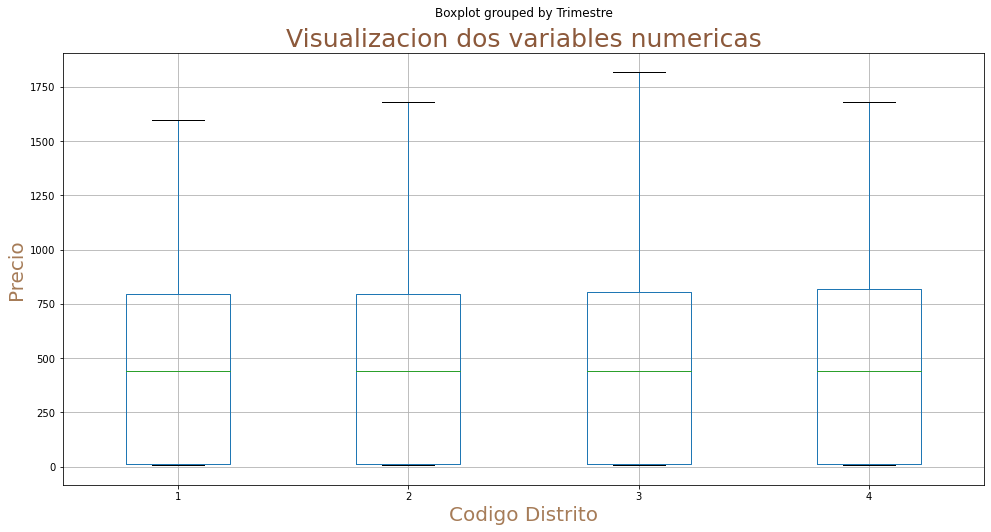

In [15]:
df.boxplot(column=['Preu'], by=['Trimestre'], figsize=(16,8))
plt.title("Visualizacion dos variables numericas",fontdict= font1)
plt.xlabel('Codigo Distrito', fontdict= font)
plt.ylabel('Precio', fontdict= font)
plt.savefig('variableNum&Num.png')
plt.show()

### Dos variables numéricas (Año o Trimestre y Precio)

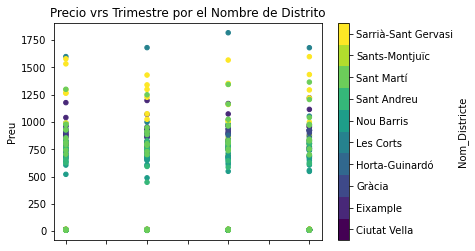

In [24]:
df.Nom_Districte = df.Nom_Districte.astype('category')

df.plot.scatter(x='Trimestre', y='Preu', c='Nom_Districte', colormap='viridis')

plt.title('Precio vrs Trimestre por el Nombre de Distrito')
plt.savefig('variableTres.png')
plt.show()

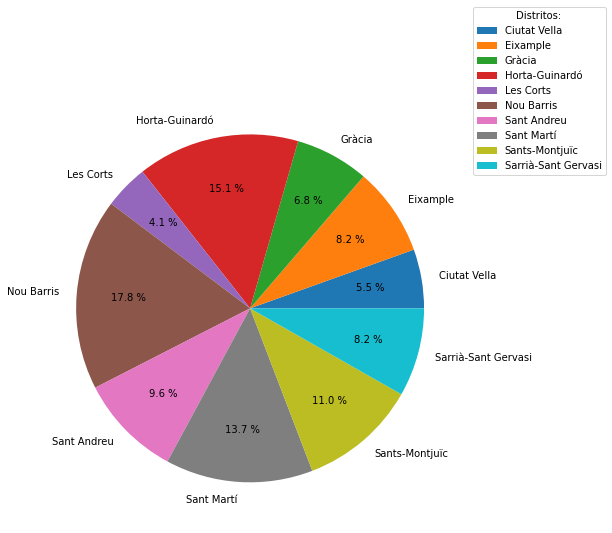

In [66]:
plt.figure(figsize=(18,8))
do = df.groupby(["Nom_Districte"]).size().reset_index(name="Total")

barrios = do['Nom_Districte']
total = do['Total']

plt.pie(total, labels=barrios, autopct="%0.1f %%", labeldistance=1.1, pctdistance=0.7)
plt.legend(title = "Distritos:",  loc="center left", bbox_to_anchor=(1, 0.5, 0.5, 1))

plt.savefig('PieDistric.png')
plt.show()